In [1]:
import torchvision as tv
from matplotlib import pyplot as plt
import numpy as np
import torchvision.transforms.functional as F
import sys
import os
import torch

In [2]:
torch.manual_seed(0)
np.random.seed(0)
path2add = os.path.abspath('..')
if path2add not in sys.path:
    sys.path.append(path2add)

In [3]:

from maskaugfish import augmentation

In [4]:
image_path = "..\\data\\fish_image\\fish_01\\fish_000000009598_05281.png"
mask_path = "..\\data\\mask_image\\mask_01\\mask_000000009598_05281.png"

In [5]:
image = tv.io.decode_image(image_path)
mask = tv.io.decode_image(mask_path)
print(image.shape)
print(mask.shape)

torch.Size([3, 112, 104])
torch.Size([1, 112, 104])


In [6]:
def show_image(img, title="Image"):
    plt.imshow(tv.transforms.functional.to_pil_image(img))
    plt.title(title)
    plt.axis('off')
    plt.show()


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

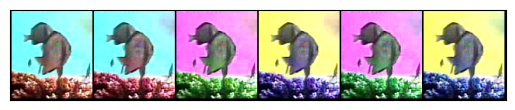

In [7]:
# Generate augmented images
transform = augmentation.channel_switch_transform(prob=1.0)
image_list = [image]
for i in range(5):
    const_p = [0.0] * 6
    const_p[i + 1] = 1.0
    transform.p = const_p
    augmented_image = transform(image)
    image_list.append(augmented_image)
grid = tv.utils.make_grid(image_list, nrow=6)
show(grid)


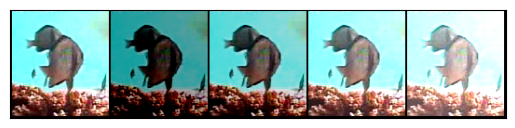

In [8]:
image_list = [image]
for value in [-75, -25, 25, 75]:
    transform = augmentation.addition_transform(prob=1,
                                   value=value)
    augmented_image = transform(image)
    image_list.append(augmented_image)
grid = tv.utils.make_grid(image_list, nrow=5)
show(grid)

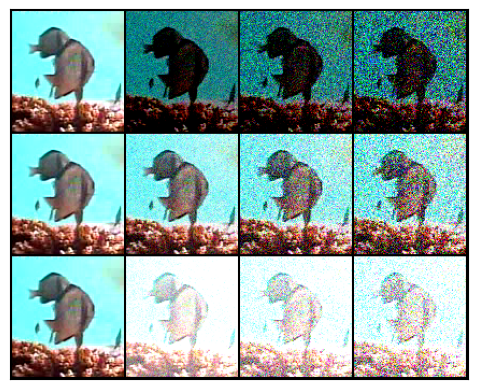

In [9]:
image_list = []
for mean in [-0.5, 0.0, 0.5]:
    image_list.append(image)
    for std in [0.1, 0.2, 0.3]:
        transform = augmentation.gaussian_noise_transform(prob=1,
                                                          mean=mean,
                                                          std=std)
        image_list.append(transform(image))
grid = tv.utils.make_grid(image_list, nrow=4)
show(grid)

In [10]:
def region_transform(original_image: torch.Tensor,
                        augmented_image: torch.Tensor,
                        mask: torch.Tensor,
                        regime: str) -> torch.Tensor:
    # Demo version of `augmentation.region_transform` function
    if regime == "whole-image":
        return augmented_image
    elif regime == "background-only":
        return torch.where(mask.bool(), original_image, augmented_image)
    elif regime == "fish-only":
        return torch.where(mask.bool(), augmented_image, original_image)
    else:
        raise ValueError("region_transform is only for " +
                            "'fish-only' or 'background-only' regimes.")

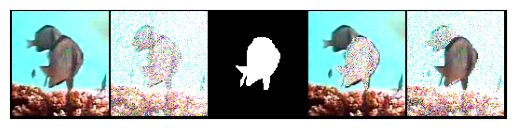

In [11]:
# Fish-only augmentation
image_list = [image,
              transform(image),
              torch.cat([mask] * 3, dim=0),]
image_list.append(region_transform(image, transform(image), mask, regime="fish-only"))
image_list.append(region_transform(image, transform(image), mask, regime="background-only"))
grid = tv.utils.make_grid(image_list, nrow=6)
show(grid)

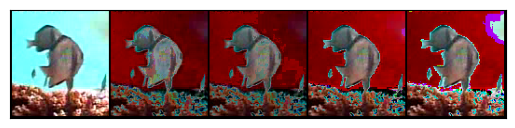

In [12]:
image_list = [image]
for threshold in [100, 150, 200, 250]:
    transform = tv.transforms.v2.RandomSolarize(threshold, p=1.0)
    augmented_image = transform(image)
    image_list.append(augmented_image)
grid = tv.utils.make_grid(image_list, nrow=5)
show(grid)

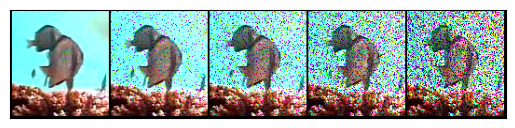

In [13]:
image_list = [image]
for p in [0.05, 0.1, 0.2, 0.3]:
    transform = augmentation.dropout_transform(prob=1, dropout_prob=p)
    augmented_image = transform(image)
    image_list.append(augmented_image)
grid = tv.utils.make_grid(image_list, nrow=5)
show(grid)

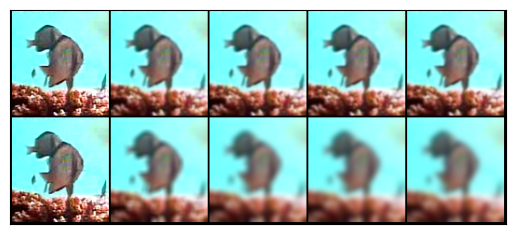

In [14]:
image_list = []
for sigma in [1.0, 3.0]:
    image_list.append(image)
    for kernal_size in [7, 11, 15, 19]:
        transform = augmentation.gaussian_blur_transform(prob=1, kernel_size=kernal_size, sigma=sigma)
        augmented_image = transform(image)
        image_list.append(augmented_image)
grid = tv.utils.make_grid(image_list, nrow=5)
show(grid)

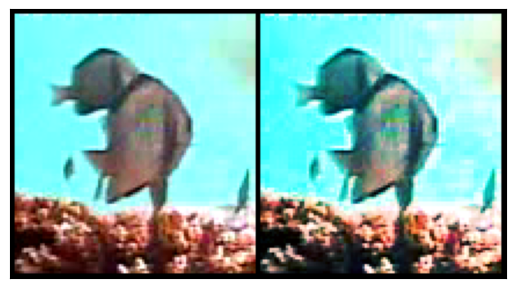

In [15]:
image_list = [image]
transform = tv.transforms.v2.RandomEqualize(p=1.0)
image_list.append(transform(image))
grid = tv.utils.make_grid(image_list, nrow=2)
show(grid)

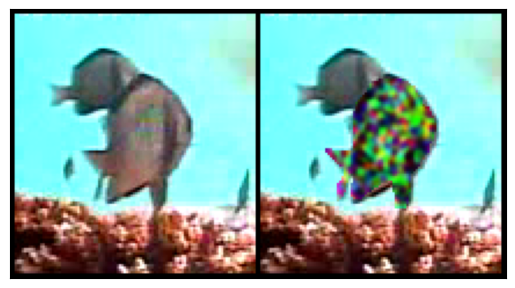

In [16]:
Pipeline = augmentation.Augmentation(config_file="../demo/augmentation_example.json",
                                     regime="fish-only",)
augmented_image = Pipeline(image, mask)
image_list = [image, augmented_image]
grid = tv.utils.make_grid(image_list, nrow=2)
show(grid)

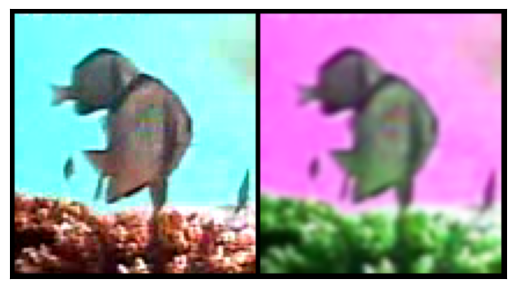

In [17]:
Pipeline = augmentation.Augmentation(config_file="../demo/augmentation_example.json",
                                     regime="whole-image",)
augmented_image = Pipeline(image, mask)
image_list = [image, augmented_image]
grid = tv.utils.make_grid(image_list, nrow=2)
show(grid)

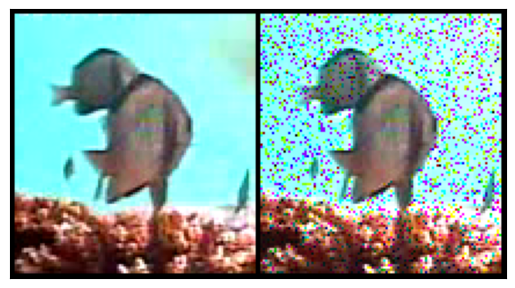

In [18]:
Pipeline = augmentation.Augmentation(config_file="../demo/augmentation_example.json",
                                     regime="background-only",)
augmented_image = Pipeline(image, mask)
image_list = [image, augmented_image]
grid = tv.utils.make_grid(image_list, nrow=2)
show(grid)